In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import my_library.constants as constants

## Change font for plot. 

> i think its fontfamily or something
> chatgpt will know

In [3]:
def get_t_middle(t):
    return constants.T_CUT_DICT[t][0] + constants.T_WIDTH_DICT[t] / 2

In [4]:
path_to_files = '/work/halld/home/viducic/data/fit_params/{}/tf1_gaus_yield_values.csv'

df_pipkmks = pd.read_csv(path_to_files.format('pipkmks'))
df_pimkpks = pd.read_csv(path_to_files.format('pimkpks'))

df_pipkmks['bs_rel_err'] = np.where(True, df_pipkmks['yield_err']/df_pipkmks['yield'], 0)
df_pimkpks['bs_rel_err'] = np.where(True, df_pimkpks['yield_err']/df_pimkpks['yield'], 0)

df_pipkmks['t_middle'] = df_pipkmks['t'].apply(get_t_middle)
df_pimkpks['t_middle'] = df_pimkpks['t'].apply(get_t_middle)

pipkmks_grouped = df_pipkmks.groupby('e')
pimkpks_grouped = df_pimkpks.groupby('e')

In [5]:
# print(df_bootstrapped_pipkmks[df_bootstrapped_pipkmks['t_bin'] == 7].to_markdown())

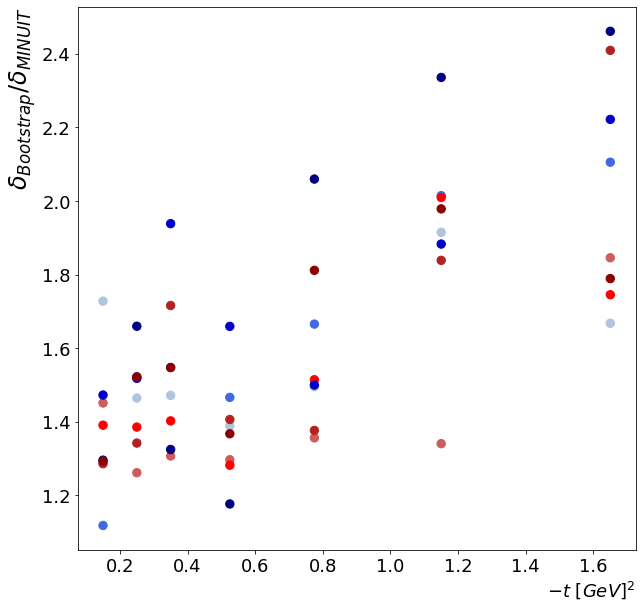

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
fig.set_facecolor('white')

energy_colors = {
    8: ('lightsteelblue', 'indianred'),
    9: ('royalblue', 'red'),
    10: ('mediumblue', 'firebrick'),
    11: ('navy', 'darkred')
}


for (epip, grouppip), (epim, grouppim) in zip(pipkmks_grouped, pimkpks_grouped): 
    ax.scatter(grouppip['t_middle'], grouppip['bs_rel_err']/grouppip['minuit_err'], [70]*len(grouppip), c=energy_colors[epip][0])
    ax.scatter(grouppim['t_middle'], grouppim['bs_rel_err']/grouppim['minuit_err'], [70]*len(grouppip), c=energy_colors[epim][1])
    ax.set_title('')
    ax.set_xlabel('$-t ~[GeV]^2$', loc='right', fontsize=18)
    ax.tick_params(axis='x', labelsize=18)
    ax.tick_params(axis='y', labelsize=18)
    ax.set_ylabel('$\delta_{Bootstrap}/\delta_{MINUIT}$', loc='top', fontsize=24)

plt.show()

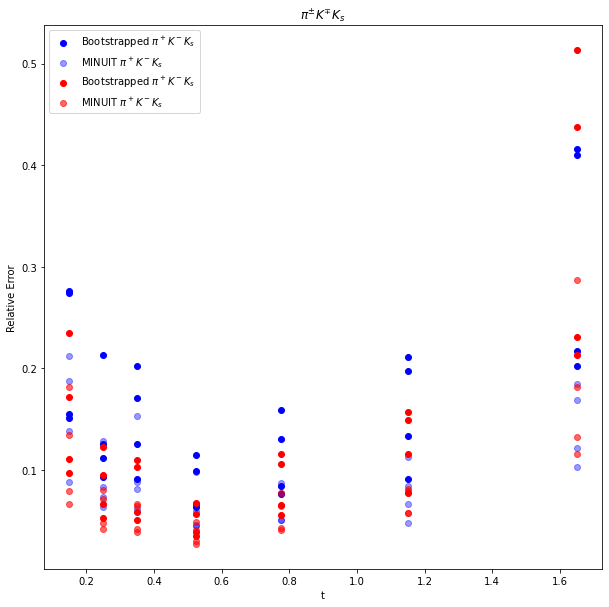

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
fig.set_facecolor('white')


ax.scatter(df_pipkmks['t_middle'], df_pipkmks['bs_rel_err'], c='blue', label='Bootstrapped $\pi^+K^-K_s$')
ax.scatter(df_pipkmks['t_middle'], df_pipkmks['minuit_err'], c='blue', alpha=0.4, label='MINUIT $\pi^+K^-K_s$')
ax.scatter(df_pimkpks['t_middle'], df_pimkpks['bs_rel_err'], c='red', label='Bootstrapped $\pi^+K^-K_s$')
ax.scatter(df_pimkpks['t_middle'], df_pimkpks['minuit_err'], c='red', alpha=0.6, label='MINUIT $\pi^+K^-K_s$')

ax.set_title('$\pi^{\pm}K^{\mp}K_s$')
ax.set_xlabel('t')
ax.set_ylabel('Relative Error')
ax.legend()

plt.show()

In [8]:
# df_err_func = pd.read_csv('/work/halld/home/viducic/data/fit_params/pipkmks/bootstrap_err_nominal.csv')

# fig, ax = plt.subplots(figsize=(10, 10))
# fig.set_facecolor('white')
# ax.scatter(df_err_func['t_bin'], df_err_func['bootstrap_err'], c='blue', marker='o', label='Bootstrapped Function [n = 1000] $\pi^+K^-K_s$')
# ax.scatter(df_pipkmks['t'], df_pipkmks['bs_rel_err'], c='blue', alpha=0.5, marker="x", label='Bootstrapped Calculation [n = 10,000] $\pi^+K^-K_s$')
# ax.set_title('$\pi^{\pm}K^{\mp}K_s$')
# ax.set_xlabel('t')
# ax.set_ylabel('Relative Error')
# ax.legend()

# plt.show()

In [9]:
path_to_amps = '/work/halld/home/viducic/data/fit_params/{}/bootstrap_amplitudes.csv'
df_pipkmks_bs_amps = pd.read_csv(path_to_amps.format('pipkmks'))
df_pimkpks_bs_amps = pd.read_csv(path_to_amps.format('pimkpks'))

bs_grouped_pipkmks = df_pipkmks_bs_amps.groupby(['e_bin', 't_bin'])
bs_grouped_pimkpks = df_pimkpks_bs_amps.groupby(['e_bin', 't_bin'])

In [ ]:
for e in range(8, 12):
    fig, axs = plt.subplots(2,4,figsize=(10, 10))
    axs[1,3].axis('off')
    fig.suptitle(f'$K^-K_s\pi^+$, $E_\gamma = {e}$ [GeV]', fontsize=30)
    fig.text(0.5, -0.02, 'Voigt Amplitude', fontsize=30, ha='center')
    fig.text(-0.01, 0.5, 'Counts', va='center', fontsize=30, rotation='vertical')
    fig.set_tight_layout(True)
    fig.set_facecolor('white')
    for t in range(1, 8):
        t_middle = constants.T_CUT_DICT[t][0] + (constants.T_WIDTH_DICT[t] / 2)
        row = (t-1) // 4
        col = (t-1) % 4
        ax = axs[row, col]
        ax.set_title(f't={t_middle:0.2f} GeV$^2$', fontsize=15)
        ax.tick_params(axis='x', labelsize=15)
        ax.tick_params(axis='y', labelsize=15)
        # ax.set_xlabel('Fit Amplitude')
        # ax.set_ylabel('Frequency')
        ax.hist(bs_grouped_pipkmks.get_group((e, t))['amplitude'], bins=50, color=energy_colors[e][0], alpha=0.8, label='Bootstrap')
    fig.savefig(f'/work/halld/home/viducic/scripts/crosssection/plots/bootstrapped_fits/pipkmks_e{e}.png', facecolor=fig.get_facecolor(), transparent=False)
plt.show()

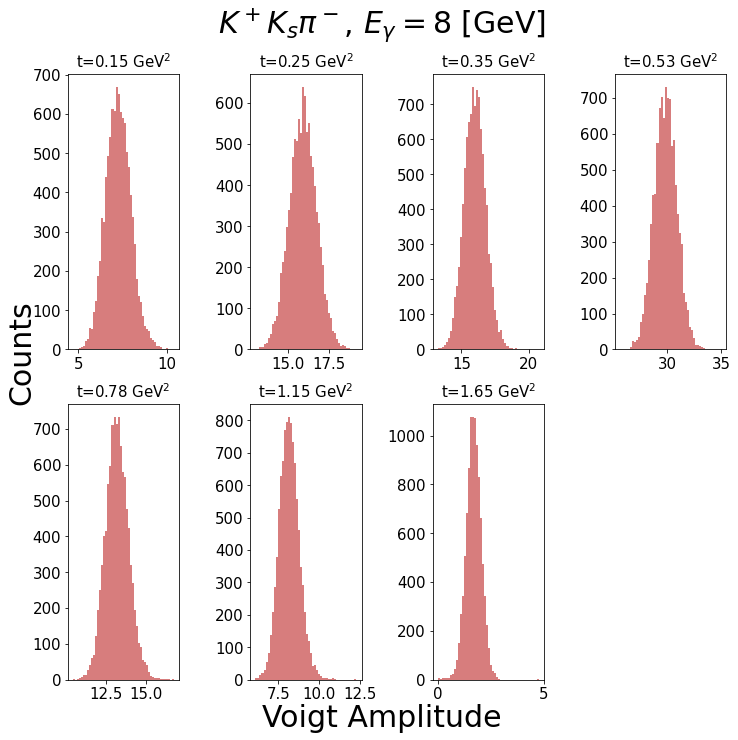

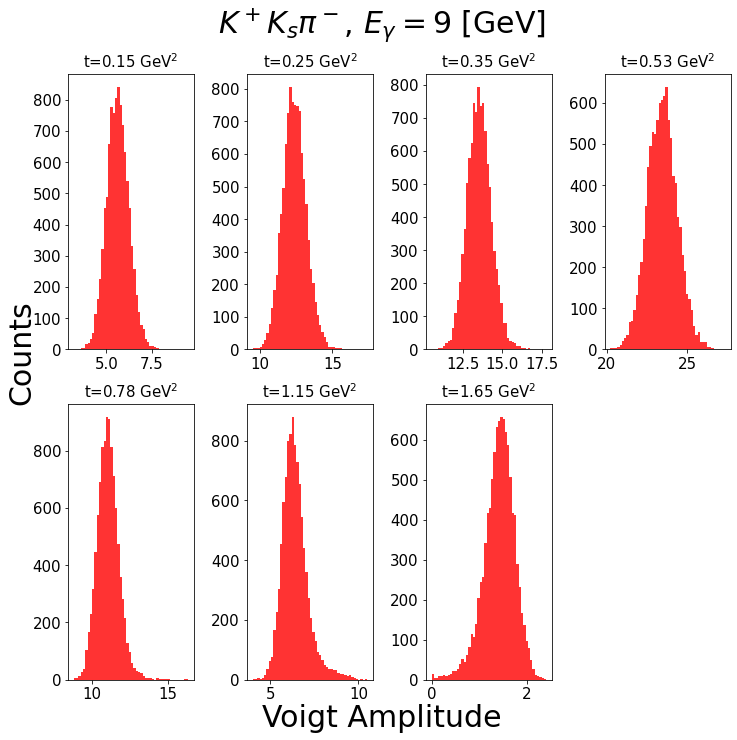

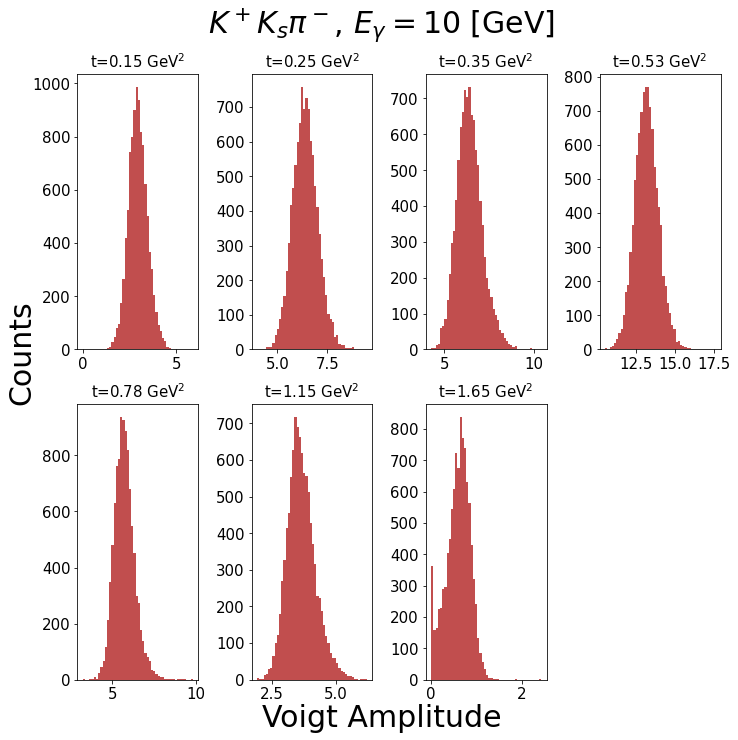

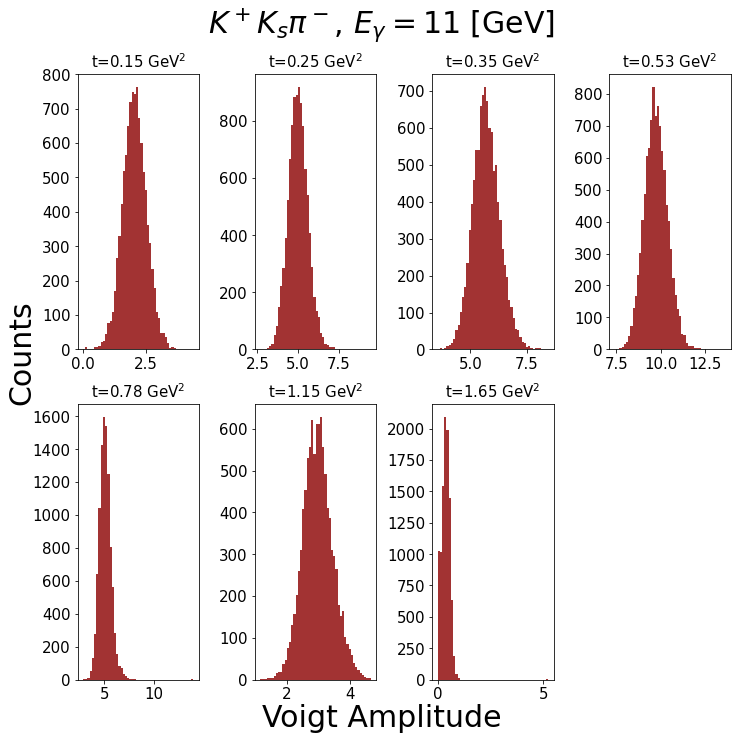

In [28]:
for e in range(8, 12):
    fig, axs = plt.subplots(2,4,figsize=(10, 10))
    axs[1,3].axis('off')
    fig.suptitle(f'$K^+K_s\pi^-$, $E_\gamma = {e}$ [GeV]', fontsize=30)
    fig.text(0.5, -0.02, 'Voigt Amplitude', fontsize=30, ha='center')
    fig.text(-0.02, 0.5, 'Counts', va='center', fontsize=30, rotation='vertical')
    fig.set_tight_layout(True)
    fig.set_facecolor('white')
    for t in range(1, 8):
        t_middle = constants.T_CUT_DICT[t][0] + (constants.T_WIDTH_DICT[t] / 2)
        row = (t-1) // 4
        col = (t-1) % 4
        ax = axs[row, col]
        ax.set_title(f't={t_middle:0.2f} GeV$^2$' , fontsize=15)
        ax.tick_params(axis='x', labelsize=15)
        ax.tick_params(axis='y', labelsize=15)
        # ax.set_xlabel('Fit Amplitude')
        # ax.set_ylabel('Frequency')
        ax.hist(bs_grouped_pimkpks.get_group((e, t))['amplitude'], bins=50, color=energy_colors[e][1], alpha=0.8, label='Bootstrap')
    fig.savefig(f'/work/halld/home/viducic/scripts/crosssection/plots/bootstrapped_fits/pimkpks_e{e}.png', facecolor=fig.get_facecolor(), transparent=False)
plt.show()